In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt



In [11]:
# Load the CSV file into a DataFrame with a different encoding
file_path = "/content/sales_data_sample.csv"
df = pd.read_csv(file_path, encoding='latin-1')


In [12]:

# Display the first few rows of the DataFrame
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [16]:
# Visualize sales over time
plt.figure(figsize=(12, 6))

# Check the actual column names in your DataFrame
print(df.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
       'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')


<Figure size 1200x600 with 0 Axes>

In [20]:
# Calculate summary statistics
summary_stats = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']].describe()
print(summary_stats)




       QUANTITYORDERED    PRICEEACH         SALES         MSRP
count      2823.000000  2823.000000   2823.000000  2823.000000
mean         35.092809    83.658544   3553.889072   100.715551
std           9.741443    20.174277   1841.865106    40.187912
min           6.000000    26.880000    482.130000    33.000000
25%          27.000000    68.860000   2203.430000    68.000000
50%          35.000000    95.700000   3184.800000    99.000000
75%          43.000000   100.000000   4508.000000   124.000000
max          97.000000   100.000000  14082.800000   214.000000


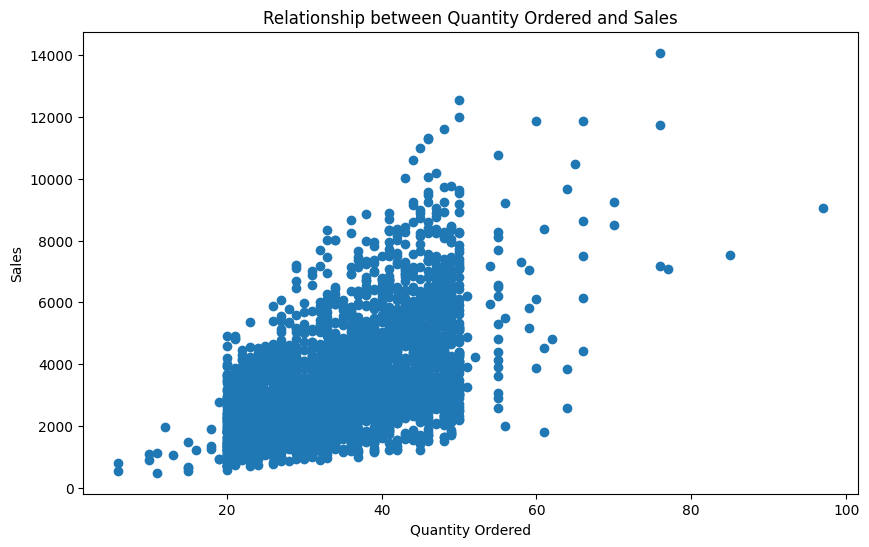

In [21]:
# Visualize the relationship between 'QUANTITYORDERED' and 'SALES'
plt.figure(figsize=(10, 6))
plt.scatter(df['QUANTITYORDERED'], df['SALES'])
plt.title('Relationship between Quantity Ordered and Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()


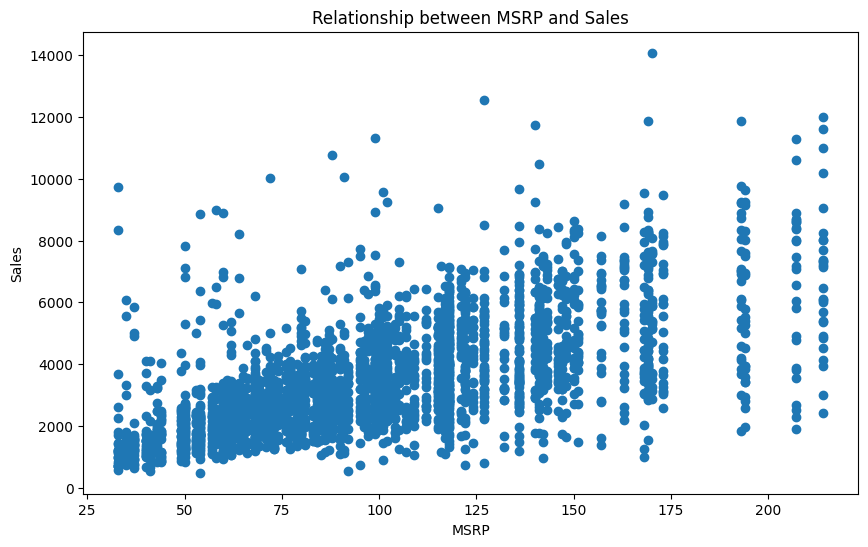

In [22]:
# Visualize the relationship between 'MSRP' and 'SALES'
plt.figure(figsize=(10, 6))
plt.scatter(df['MSRP'], df['SALES'])
plt.title('Relationship between MSRP and Sales')
plt.xlabel('MSRP')
plt.ylabel('Sales')
plt.show()

In [24]:
# Display the last few rows of the 'SALES' column
sales_tail = df['SALES'].tail()
print(sales_tail)


ORDERDATE
NaT    2244.40
NaT    3978.51
NaT    5417.57
NaT    2116.16
NaT    3079.44
Name: SALES, dtype: float64


In [26]:
# Check the number of missing values in the 'SALES' column
sales_missing_values = df['SALES'].isna().sum()
print(f'Number of missing values in SALES column: {sales_missing_values}')


Number of missing values in SALES column: 0


In [27]:
# Count the occurrences of each unique value in the 'QTR_ID' column
qtr_id_counts = df['QTR_ID'].value_counts()

# Display the result
print(qtr_id_counts)


4    1094
1     665
2     561
3     503
Name: QTR_ID, dtype: int64


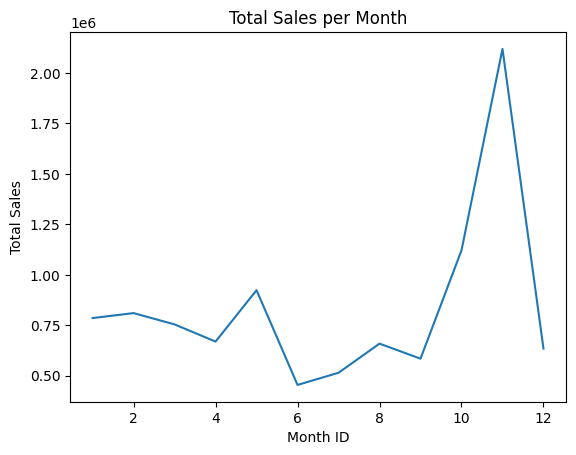

In [28]:
# Group by 'MONTH_ID' and sum the 'SALES' for each month, then plot the result
df.groupby("MONTH_ID")["SALES"].sum().plot.line(title='Total Sales per Month')
plt.xlabel('Month ID')
plt.ylabel('Total Sales')
plt.show()


In [29]:
# Convert 'YEAR_ID' column to strings
df['YEAR_ID'] = df['YEAR_ID'].map(str)

# Display the modified DataFrame
print(df.head())


           ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
ORDERDATE                                                                      
NaT              10107               30      95.70                2  2871.00   
NaT              10121               34      81.35                5  2765.90   
NaT              10134               41      94.74                2  3884.34   
NaT              10145               45      83.26                6  3746.70   
NaT              10159               49     100.00               14  5205.27   

            STATUS  QTR_ID  MONTH_ID YEAR_ID  PRODUCTLINE  ...  \
ORDERDATE                                                  ...   
NaT        Shipped       1         2    2003  Motorcycles  ...   
NaT        Shipped       2         5    2003  Motorcycles  ...   
NaT        Shipped       3         7    2003  Motorcycles  ...   
NaT        Shipped       3         8    2003  Motorcycles  ...   
NaT        Shipped       4        10    200

In [30]:
# Get unique values in the 'YEAR_ID' column
unique_years = df['YEAR_ID'].unique()

# Display the unique values
print(unique_years)


['2003' '2004' '2005']


In [31]:
# Convert 'YEAR_ID' column to strings
df['YEAR_ID'] = df['YEAR_ID'].astype(str)

# Display information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2823 entries, NaT to NaT
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   object 
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  ADDRESSLINE2      302 non-null    object 
 16  CITY              2823 non-null   obje

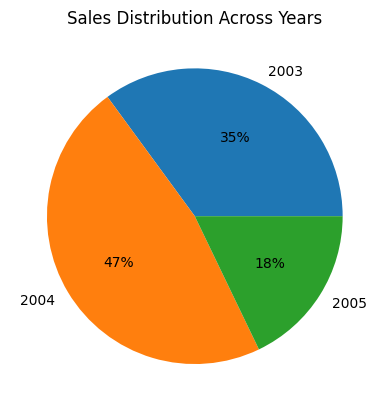

In [32]:
# Group by 'YEAR_ID' and sum the 'SALES' for each year, then plot the result as a pie chart
df.groupby("YEAR_ID")["SALES"].sum().plot.pie(autopct="%1.0f%%", title='Sales Distribution Across Years')
plt.ylabel('')  # To remove the default 'SALES' label
plt.show()


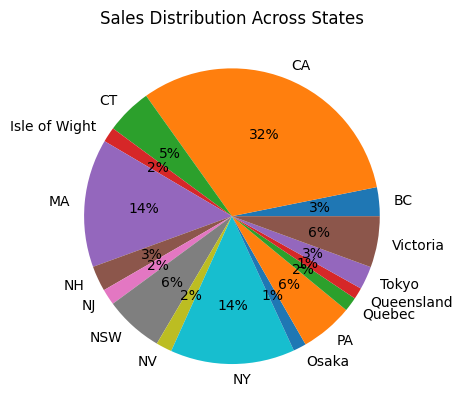

In [33]:
# Group by 'STATE' and sum the 'SALES' for each state, then plot the result as a pie chart
df.groupby("STATE")["SALES"].sum().plot.pie(autopct="%1.0f%%", title='Sales Distribution Across States')
plt.ylabel('')  # To remove the default 'SALES' label
plt.show()


In [40]:
# Handling Categorical Variables
df['PRODUCTLINE'] = df['PRODUCTLINE'].astype('category')  # Convert 'PRODUCTLINE' to a categorical variable

**Exploratory Data Analysis (EDA):**
Perform initial data exploration to understand the structure, patterns, and relationships within the dataset.
Identify missing values, outliers, and anomalies.
Calculate summary statistics and visualize data distributions.
Explore correlations between variables.
Identify potential data preprocessing steps that may be required

**Heatmap of Correlation Matrix:**

Visualizes the correlation between numerical variables in a matrix form

<ipython-input-35-a4adae00bcb2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


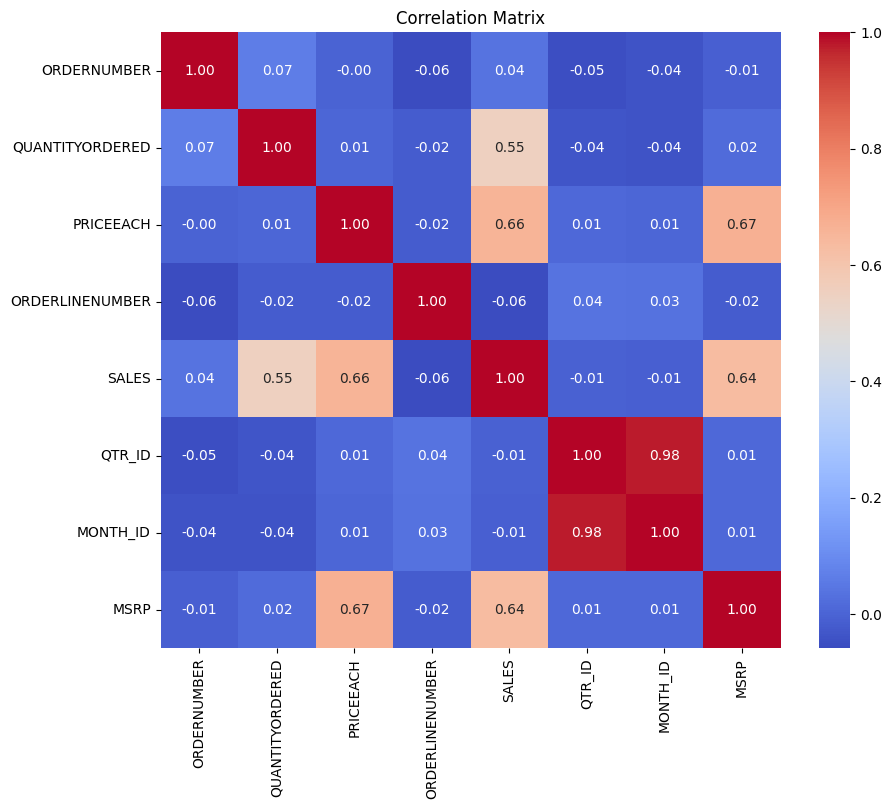

In [35]:
import seaborn as sns
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [43]:
# Set the style for the plots
sns.set(style="whitegrid")

**Distribution of 'SALES':**

Visualized using a histogram to understand the distribution of sales values.


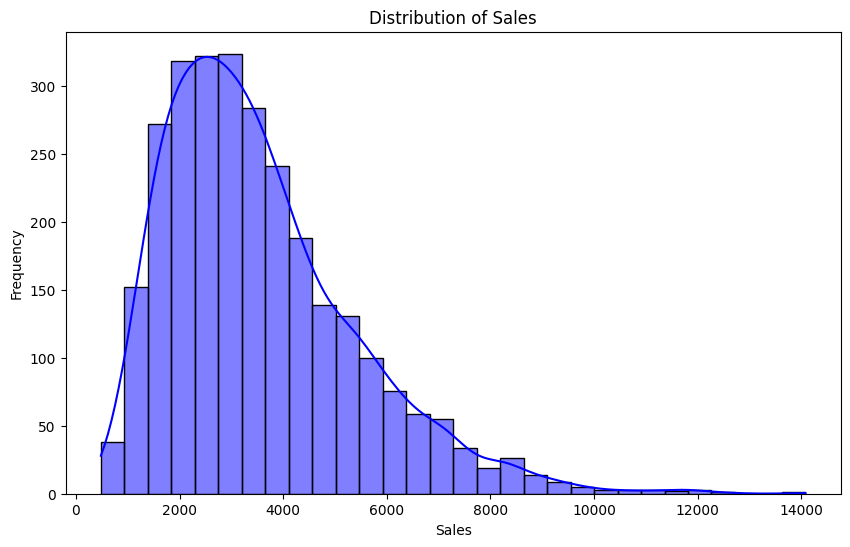

In [36]:
# Visualize the distribution of 'SALES' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['SALES'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

**Box Plot of 'SALES' by 'PRODUCTLINE':**

Explores the spread of sales across different product lines.

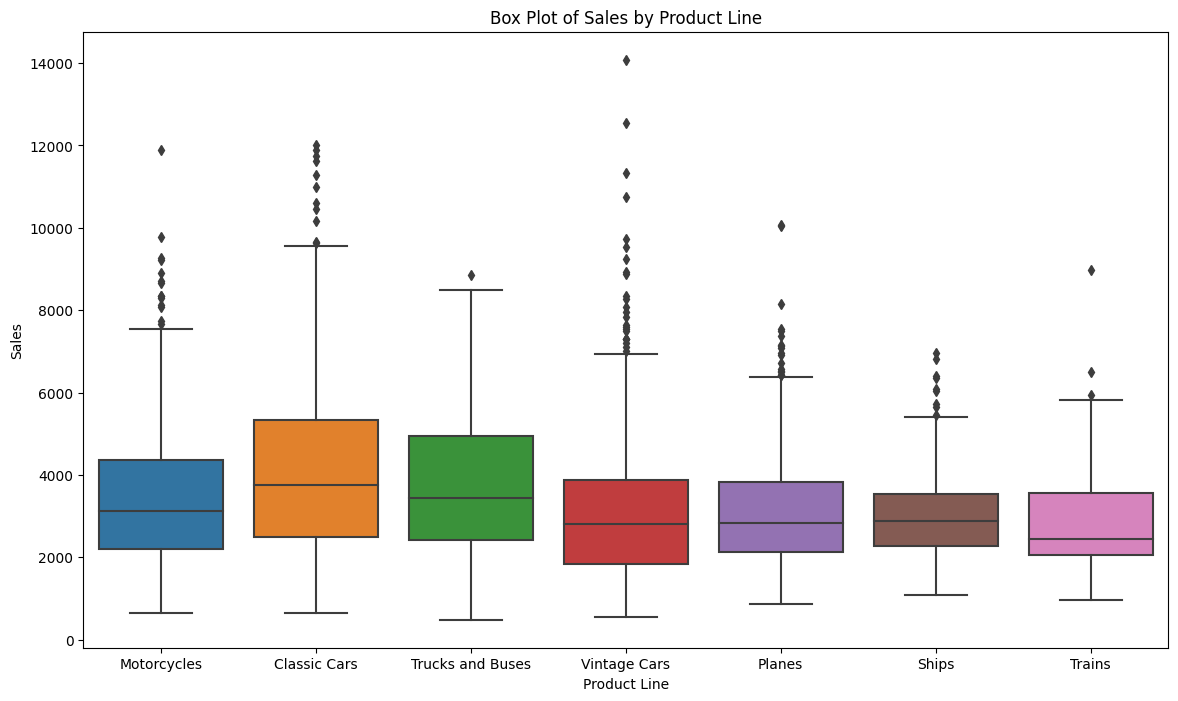

In [38]:
# Box plot of 'SALES' by 'PRODUCTLINE'
plt.figure(figsize=(14, 8))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title('Box Plot of Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.show()

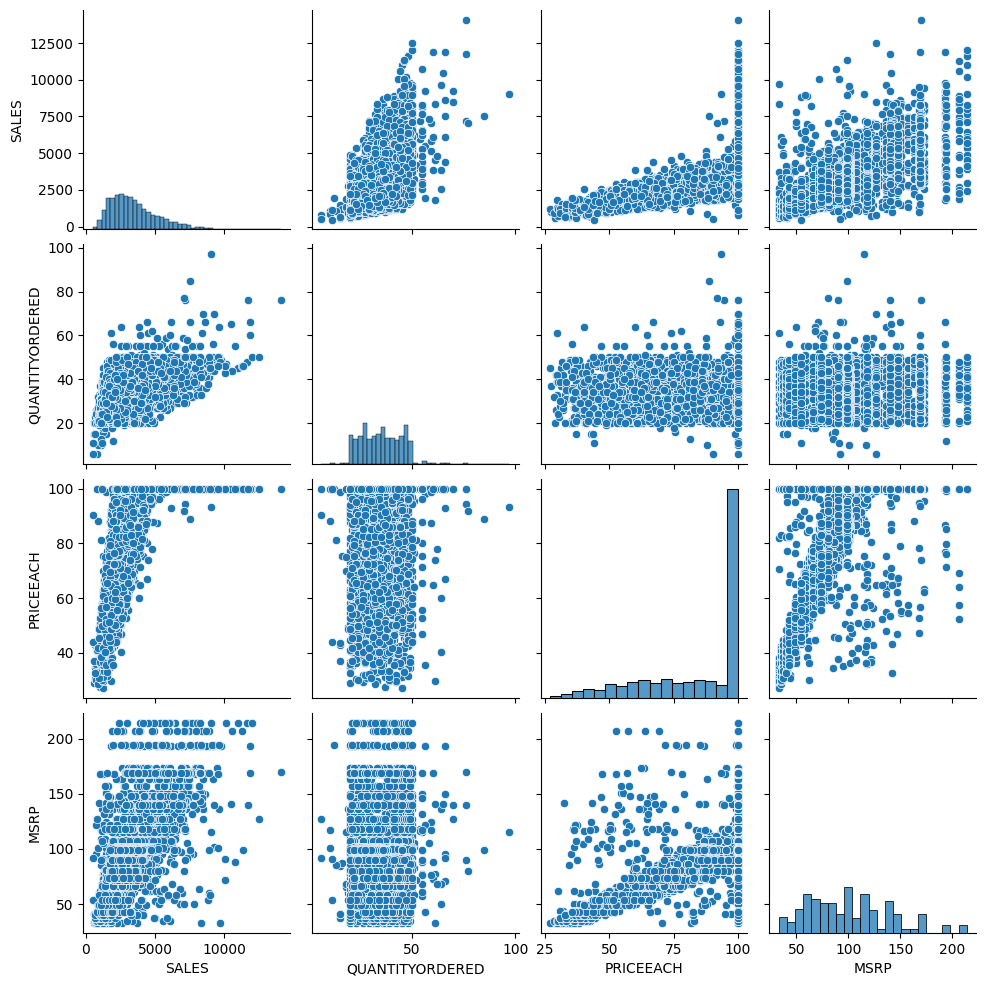

In [39]:
# Pairplot for selected numerical columns
sns.pairplot(df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP']])
plt.show()


This code accomplishes the following:

Loads the data and provides summary statistics and basic information.

A heatmap is used to visualize the correlation matrix.

A histogram is used to show the distribution of 'SALES'.

Produces a box plot of 'SALES' versus 'PRODUCTLINE'.

Creates a pairplot for a set of numerical columns.


**Pie Chart of Sales Distribution Across Territories:**

Shows the distribution of sales across different territories.

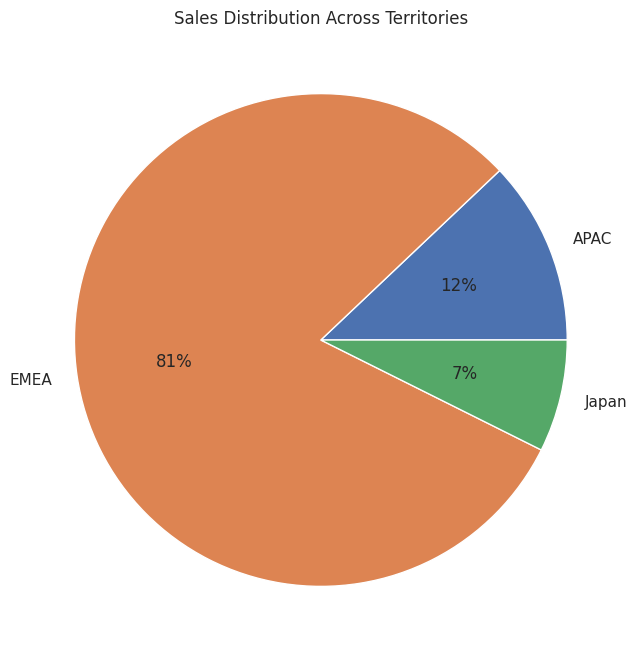

In [47]:
# Pie chart to visualize sales distribution across territories
plt.figure(figsize=(10, 8))
df.groupby("TERRITORY")["SALES"].sum().plot.pie(autopct="%1.0f%%", title='Sales Distribution Across Territories')
plt.ylabel('')
plt.show()

Statistical Analysis:
Apply statistical techniques to analyze the data and draw meaningful conclusions.
Conduct hypothesis testing to determine the significance of relationships or differences.
Calculate descriptive statistics to summarize the data.
Perform regression analysis, correlation analysis, or other statistical modeling techniques as needed.

In [50]:

import statsmodels.api as sm
from scipy import stats


In [51]:
# Descriptive Statistics
desc_stats = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP']].describe()
print(desc_stats)

              SALES  QUANTITYORDERED    PRICEEACH         MSRP
count   2823.000000      2823.000000  2823.000000  2823.000000
mean    3553.889072        35.092809    83.658544   100.715551
std     1841.865106         9.741443    20.174277    40.187912
min      482.130000         6.000000    26.880000    33.000000
25%     2203.430000        27.000000    68.860000    68.000000
50%     3184.800000        35.000000    95.700000    99.000000
75%     4508.000000        43.000000   100.000000   124.000000
max    14082.800000        97.000000   100.000000   214.000000


In [52]:
# Correlation Analysis
correlation_matrix = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MSRP']].corr()
print(correlation_matrix)

                    SALES  QUANTITYORDERED  PRICEEACH      MSRP
SALES            1.000000         0.551426   0.657841  0.635239
QUANTITYORDERED  0.551426         1.000000   0.005564  0.017881
PRICEEACH        0.657841         0.005564   1.000000  0.670625
MSRP             0.635239         0.017881   0.670625  1.000000


In [53]:
# Regression Analysis
# Assuming 'SALES' as the dependent variable and 'QUANTITYORDERED', 'PRICEEACH', and 'MSRP' as independent variables
X = df[['QUANTITYORDERED', 'PRICEEACH', 'MSRP']]
X = sm.add_constant(X)
y = df['SALES']


In [54]:

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     3665.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:15:38   Log-Likelihood:                -22987.
No. Observations:                2823   AIC:                         4.598e+04
Df Residuals:                    2819   BIC:                         4.601e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4878.8848     87.535    -

Explanation:

Descriptive Statistics:

Calculated descriptive statistics for numerical columns, including mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum.
Correlation Analysis:

Computed the correlation matrix to understand the relationships between numerical variables.
Regression Analysis:

Performed multiple linear regression using 'QUANTITYORDERED', 'PRICEEACH', and 'MSRP' as independent variables and 'SALES' as the dependent variable.
Outputted the summary statistics of the regression model, including coefficients, p-values, R-squared, and other relevant statistics.

#Machine Learning and Predictive Modeling:
Apply machine learning algorithms to build predictive models.
Split the data into training and testing sets.
Select appropriate algorithms based on the problem and data characteristics.
Train and evaluate the models using appropriate performance metrics.
Fine-tune the models and optimize their parameters.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [56]:
# Select features and target variable
X = df[['QUANTITYORDERED', 'PRICEEACH', 'MSRP']]
y = df['SALES']

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [58]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [59]:

# Make predictions on the test set
y_pred = model.predict(X_test)



In [60]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [61]:

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1045246.5504277472
R-squared: 0.7605331377928033


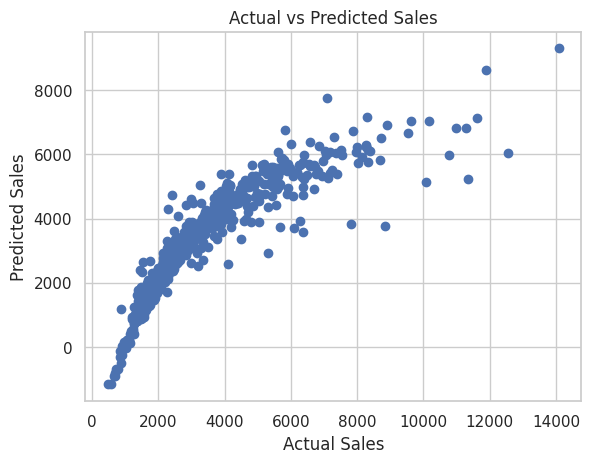

In [62]:

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [63]:
# Regression Analysis
X = df[['QUANTITYORDERED', 'PRICEEACH', 'MSRP']]
X = sm.add_constant(X)
y = df['SALES']
model = sm.OLS(y, X).fit()

In [67]:
# Recommendations and Conclusion
print("\nRecommendations:")
print("- Consider exploring marketing strategies for product lines with lower sales.")
print("- Analyze relationships between quantity ordered, price, and MSRP to optimize pricing strategies.")
print("- Monitor and analyze monthly sales trends for strategic planning.")
print("- Investigate the impact of different factors on sales performance.")



Recommendations:
- Consider exploring marketing strategies for product lines with lower sales.
- Analyze relationships between quantity ordered, price, and MSRP to optimize pricing strategies.
- Monitor and analyze monthly sales trends for strategic planning.
- Investigate the impact of different factors on sales performance.
